# This notebook is dedicated to the Exploratory Data Analysis of Research Project

### Load Required Packages

In [1]:
# loading required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Supportive Functions

In [41]:
# supportive functions
def dataset_dimension(name: str, dataset: pd.DataFrame):
    print(f"{name} dataset dimension: {dataset.shape}")

def get_null_count_df(dataset: pd.DataFrame) -> pd.DataFrame:
    null_counts = dataset.isnull().sum()
    null_df = null_counts.reset_index()
    null_df.columns = ["feature", "count"]
    return null_df

def get_null_value_summary(df: pd.DataFrame) -> pd.DataFrame:
    null_counts = get_null_count_df(df)
    null_counts["missing_percentage"] = (null_counts["count"] / len(df)) * 100
    return null_counts

def get_null_values_by_threshold_range(df: pd.DataFrame, lower_bound: float, upper_bound:float) -> pd.DataFrame:
    null_summary = get_null_value_summary(df)
    filtered_nulls = null_summary[
        (null_summary["missing_percentage"] > lower_bound) &
        (null_summary["missing_percentage"] <= upper_bound)
    ]

    return filtered_nulls

In [3]:
# data visualization functions
def show_bar_plot(data: pd.DataFrame, x_label: str, y_label:str, title, hue, figure_size=(12,6), color_palette="pastel"):
    plt.figure(figsize=figure_size)
    plt.title(title)
    sns.barplot(data=data, x=x_label, y=y_label, hue=hue, palette=color_palette)
    plt.show()



## 1. Load Datasets

In [4]:
# load data
data_path = "data/"
train_identity = pd.read_csv(data_path + "train_identity.csv")
train_transaction = pd.read_csv(data_path + "train_transaction.csv")
test_identity = pd.read_csv(data_path + "test_identity.csv")
test_transaction = pd.read_csv(data_path + "test_transaction.csv")

## 2. Understanding the Data
### 2.1 Dataset Dimensions

In [5]:
# view each dataset dimension
dataset_dimension("Identity (train)", train_identity)
dataset_dimension("Transaction (train)", train_transaction)
dataset_dimension("Identity (test)", test_identity)
dataset_dimension("Transaction (test)", test_transaction)

Identity (train) dataset dimension: (144233, 41)
Transaction (train) dataset dimension: (590540, 394)
Identity (test) dataset dimension: (141907, 41)
Transaction (test) dataset dimension: (506691, 393)


## 2.2 First Few Records of Each Dataset

In [6]:
print("Train identity dataset:")
train_identity.head()


Train identity dataset:


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
print("Train transaction dataset:")
train_transaction.head()

Train transaction dataset:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print("Test identity dataset:")
test_identity.head()

Test identity dataset:


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [9]:
print("Test transaction dataset:")
test_transaction.head()

Test transaction dataset:


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.3 Null Value Analysis
#### 2.3.1 Training Identity Data and Training Transaction Data

Train identity dataset null value analysis:


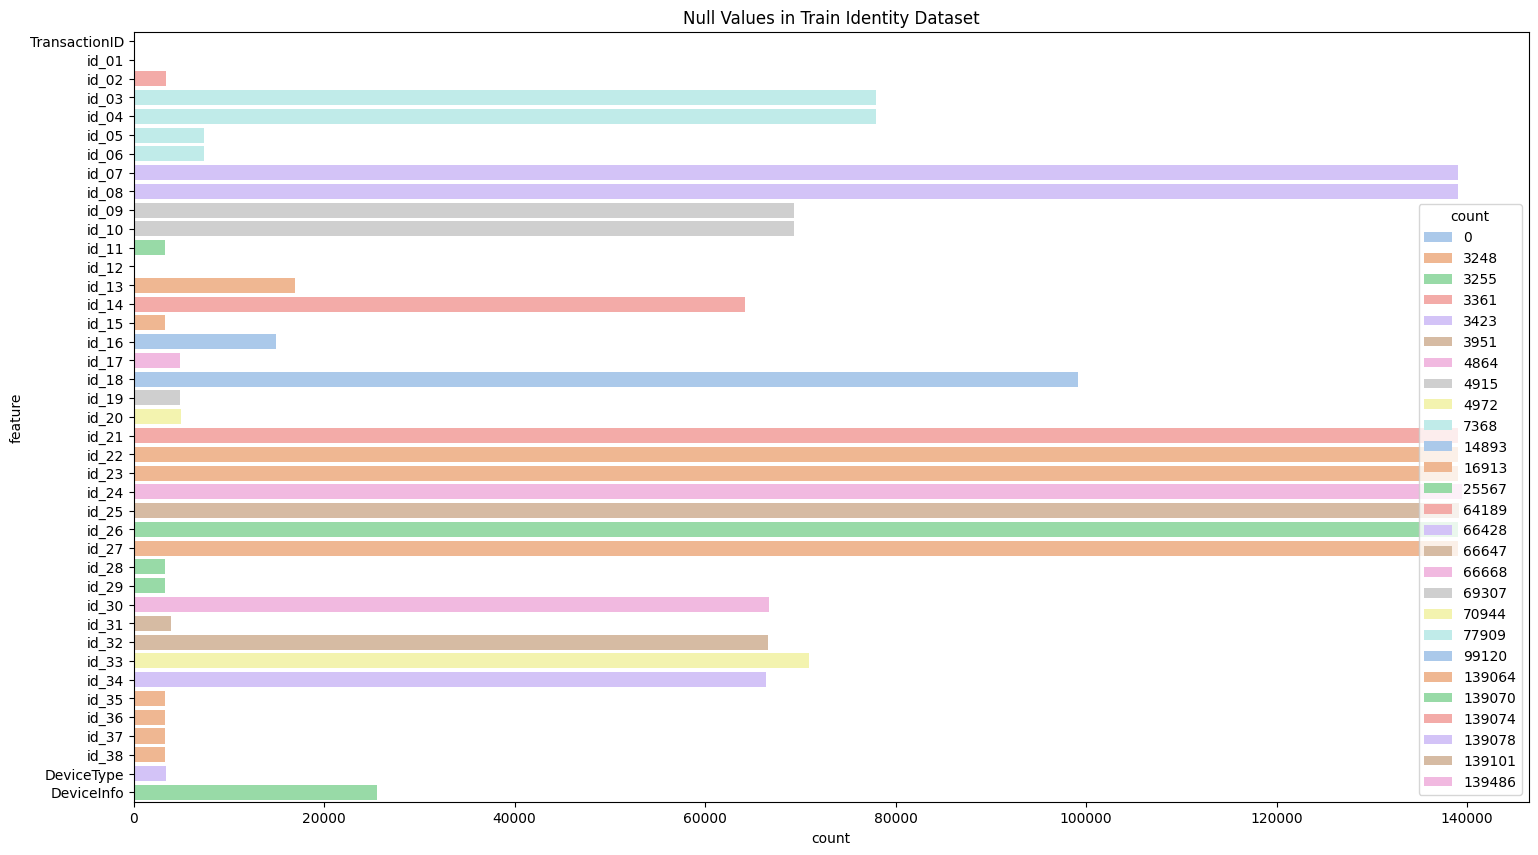

In [52]:
print("Train identity dataset null value analysis:")
show_bar_plot( get_null_count_df(train_identity), "count", "feature", "Null Values in Train Identity Dataset", "count", (18, 10))

Train transaction dataset null value analysis:


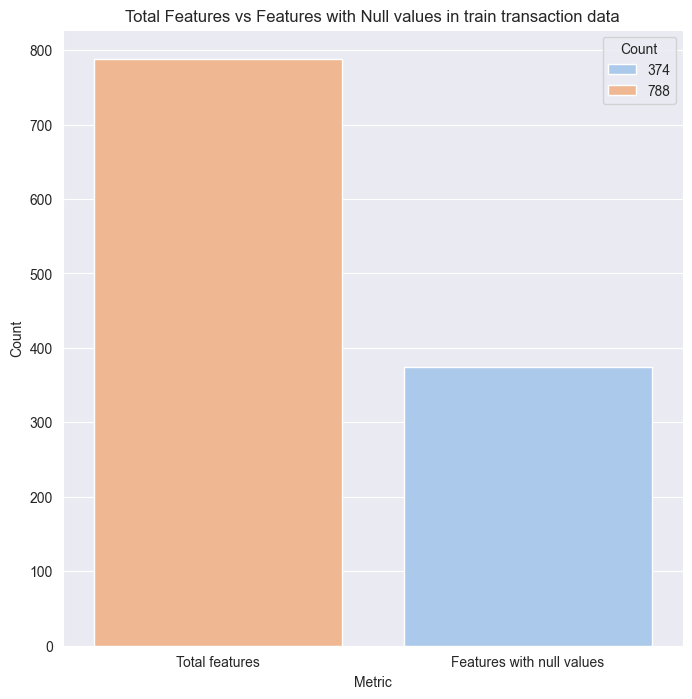

In [33]:
print("Train transaction dataset null value analysis:")

train_tran_null_values = get_null_count_df(train_transaction)

# get summary of null values
train_tran_null_summary_df = pd.DataFrame({
    "Metric": ["Total features", "Features with null values"],
    "Count": [train_tran_null_values.size, (train_tran_null_values["count"] > 0).sum()]
})

# display summary of null values
show_bar_plot(train_tran_null_summary_df , "Metric", "Count", "Total Features vs Features with Null values in train transaction data", "Count", (8, 8))


**Training transaction data: features with missing values exceeding 80%**

In [50]:
# train transaction null values by percentage
null_summary_by_percentage_80 = get_null_values_by_threshold_range(train_transaction, 80, 100)
print(null_summary_by_percentage_80)
print("Number of features: ",len(null_summary_by_percentage_80))

    feature   count  missing_percentage
14    dist2  552913           93.628374
36       D6  517353           87.606767
37       D7  551623           93.409930
38       D8  515614           87.312290
39       D9  515614           87.312290
42      D12  525823           89.041047
43      D13  528588           89.509263
44      D14  528353           89.469469
192    V138  508595           86.123717
193    V139  508595           86.123717
194    V140  508595           86.123717
195    V141  508595           86.123717
196    V142  508595           86.123717
197    V143  508589           86.122701
198    V144  508589           86.122701
199    V145  508589           86.122701
200    V146  508595           86.123717
201    V147  508595           86.123717
202    V148  508595           86.123717
203    V149  508595           86.123717
204    V150  508589           86.122701
205    V151  508589           86.122701
206    V152  508589           86.122701
207    V153  508595           86.123717


**Note:** Here, we can observe that there are several features in the training transaction dataset that have a high percentage of missing values (over 80%). Better to drop these features since most of them are null

**Training transaction data: features with missing values between 50% and 80%**

In [51]:
null_summary_by_percentage_50_80 = get_null_values_by_threshold_range(train_transaction, 50, 80)

print(null_summary_by_percentage_50_80)
print("Number of features: ",len(null_summary_by_percentage_50_80))

           feature   count  missing_percentage
13           dist1  352271           59.652352
16   R_emaildomain  453249           76.751617
35              D5  309841           52.467403
50              M5  350482           59.349409
52              M7  346265           58.635317
..             ...     ...                 ...
328           V274  460110           77.913435
329           V275  460110           77.913435
330           V276  460110           77.913435
331           V277  460110           77.913435
332           V278  460110           77.913435

[119 rows x 3 columns]
Number of features:  119


**Note:** Here,also more than 50% of the values are missing in these features. Better to drop these features as well.

**Training transaction data: features with missing values less than 50%**

In [52]:
null_summary_by_percentage_below_50 = get_null_values_by_threshold_range(train_transaction, 0, 50)
print(null_summary_by_percentage_below_50)
print("Number of features: ",len(null_summary_by_percentage_below_50))

            feature  count  missing_percentage
0     TransactionID      0            0.000000
1           isFraud      0            0.000000
2     TransactionDT      0            0.000000
3    TransactionAmt      0            0.000000
4         ProductCD      0            0.000000
..              ...    ...                 ...
371            V317     12            0.002032
372            V318     12            0.002032
373            V319     12            0.002032
374            V320     12            0.002032
375            V321     12            0.002032

[220 rows x 3 columns]
Number of features:  220


**Note:** These null values must be imputed.

##### 2.3.1.1 Training Identity and Transaction Data: Summary
TODO: complete the summary based on the above analysis


TODO: Do the same for the test datasets

### 2.4 Duplicate Records Analysis
#### 2.4.1 Training Identity Data and Training Transaction Data